In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVR

In [2]:
df = pd.read_csv('./Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.drop(columns='Serial No.', inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [5]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(500, 8)

In [20]:
#selecting features and targets
x = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

In [21]:
#standardizing
sc =StandardScaler()

In [22]:
x = sc.fit_transform(x)

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca_model = PCA().fit(x)

In [26]:
pca_model.explained_variance_ratio_

array([0.67519343, 0.10596446, 0.08023255, 0.0543379 , 0.03766808,
       0.02546844, 0.02113513])

In [27]:
pca_model.explained_variance_ratio_.cumsum()

array([0.67519343, 0.78115789, 0.86139044, 0.91572834, 0.95339642,
       0.97886487, 1.        ])

In [28]:
pca_model.singular_values_

array([48.61251905, 19.25813119, 16.75750346, 13.79067208, 11.4820858 ,
        9.44137474,  8.60075376])

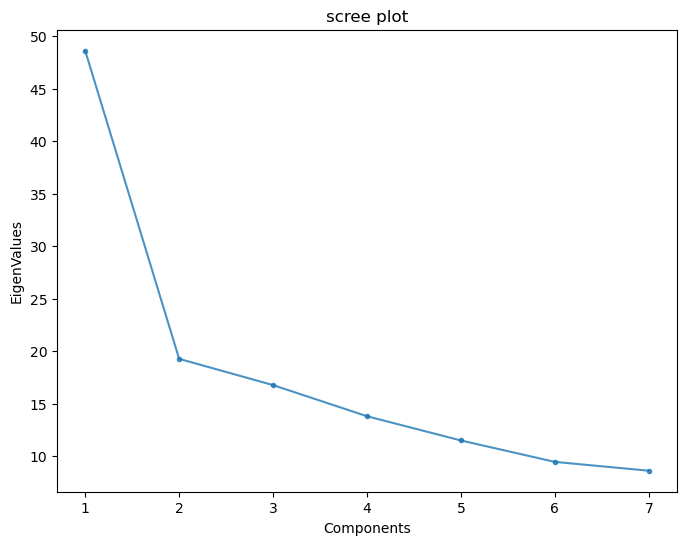

In [29]:
#screeplot
fig = plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca_model.singular_values_)+1), pca_model.singular_values_, alpha =0.8, marker='.')
y_label = plt.ylabel('EigenValues')
x_label = plt.xlabel('Components')
plt.title('scree plot')
plt.show()

#### Let's select 6 components

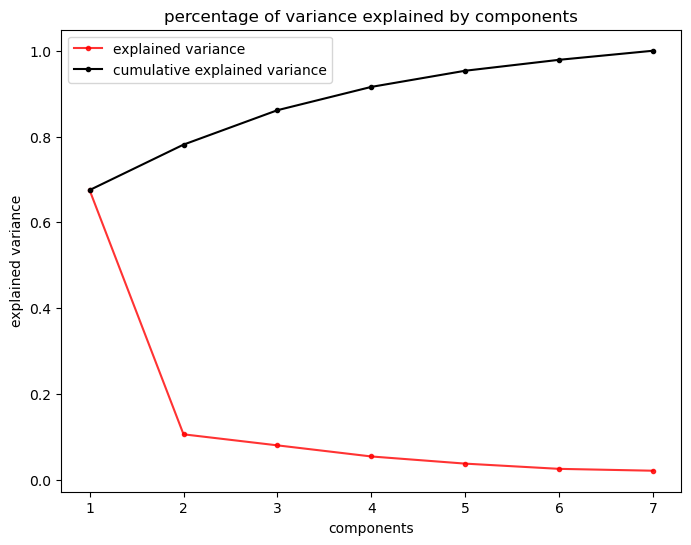

In [31]:
fig = plt.figure(figsize=(8,6))
plt.plot(range(1,len(pca_model.explained_variance_ratio_)+1), pca_model.explained_variance_ratio_, alpha =0.8,marker='.', label ='explained variance', color ='red')
y_label = plt.ylabel('explained variance')
x_label = plt.xlabel('components')
plt.plot(range(1,len(pca_model.explained_variance_ratio_)+1),pca_model.explained_variance_ratio_.cumsum(), marker ='.',label='cumulative explained variance', color ='black')
plt.legend()
plt.title('percentage of variance explained by components')
plt.show()

In [32]:
pca =PCA(n_components=6)

In [33]:
x_pca = pca.fit_transform(x)

In [34]:
x_pca.shape

(500, 6)

In [35]:
#splitting data into training and tesing 
x_train,x_test,y_train,y_test = train_test_split(x_pca, y, test_size=0.2,random_state=42)

In [36]:
#model building
model = LinearRegression()

In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred = model.predict(x_test)

In [39]:
r2_score(y_test,y_pred)

0.8016484617313253

In [40]:
model.score(x_test,y_test)

0.8016484617313253

In [41]:
model.score(x_train,y_train)

0.8167772157525058

In [42]:
mean_absolute_error(y_test,y_pred)

0.04539884680969552

In [43]:
mean_squared_error(y_test,y_pred)

0.004056288957594399

In [44]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.06368900185741962

In [50]:
OUTPUT = pd.DataFrame(zip(y_test,y_pred), columns=['Actual','Prediction']).astype(float)

In [51]:
OUTPUT

,Actual,Prediction
0,0.93,0.910980
1,0.84,0.781616
2,0.39,0.590560
3,0.77,0.696344
4,0.74,0.811888
...,...,...
95,0.42,0.439108
96,0.72,0.695506
97,0.72,0.793842
98,0.67,0.729183


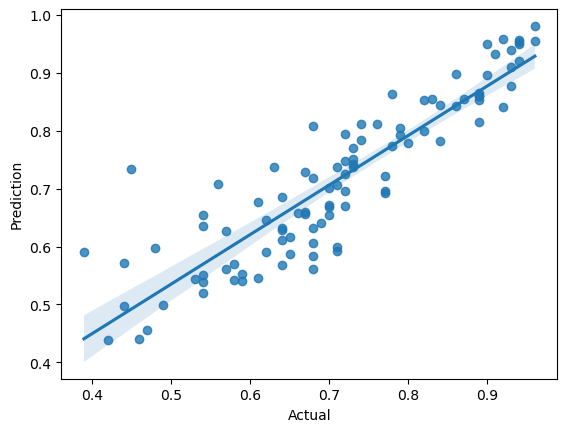

In [53]:
sns.regplot(data=OUTPUT,x='Actual', y='Prediction');

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# <space>

In [58]:
#creating a dictionary of models for iterative purpose
models ={'LinearRegression':LinearRegression(),
'DecisionTreeRegressor':DecisionTreeRegressor(),
'RandomForestRegressor':RandomForestRegressor(),
'AdaBoostRegressor':AdaBoostRegressor(),
'GradientBoostingRegressor':GradientBoostingRegressor(),
'LinearSVR':LinearSVR()
}

In [63]:
#using for loop for model training and testing
for name, model in models.items():
    model.fit(x_train,y_train)
    print("model trained with {}".format (name))
    print("training score",model.score(x_train,y_train)*100)
    print('testing score', model.score(x_test,y_test)*100)
    print('score',r2_score(y_test,model.predict(x_test))*100)
    print('mae',mean_absolute_error(y_test,model.predict(x_test)))
    print('mse',mean_squared_error(y_test,model.predict(x_test)))
    print('rmse',np.sqrt(mean_squared_error(y_test,model.predict(x_test))))
    print('*'*100)

model trained with LinearRegression
training score 81.67772157525059
testing score 80.16484617313253
score 80.16484617313253
mae 0.04539884680969552
mse 0.004056288957594399
rmse 0.06368900185741962
****************************************************************************************************
model trained with DecisionTreeRegressor
training score 100.0
testing score 62.21515892420538
score 62.21515892420538
mae 0.0633
mse 0.007727
rmse 0.08790335602239542
****************************************************************************************************
model trained with RandomForestRegressor
training score 97.18101556755477
testing score 79.14255990220052
score 79.14255990220052
mae 0.047750999999999946
mse 0.004265346499999996
rmse 0.06530962027144237
****************************************************************************************************
model trained with AdaBoostRegressor
training score 83.41982005248886
testing score 79.22762943494976
score 79.22762943494976


In [65]:
#GBR is having slightly better metrics so we can go with that
GBR = GradientBoostingRegressor()

In [66]:
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [67]:
yPred = GBR.predict(x_test)

In [68]:
output = pd.DataFrame(zip(y_test,yPred), columns=['actual', 'prediction']).astype(float)

In [70]:
output.head()

,actual,prediction
0,0.93,0.927331
1,0.84,0.796015
2,0.39,0.610136
3,0.77,0.705130
4,0.74,0.808792


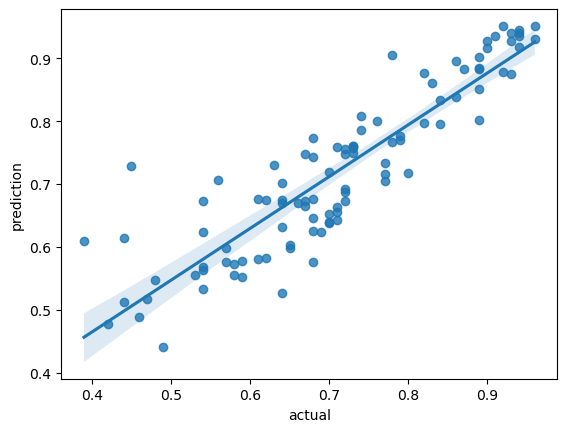

In [71]:
sns.regplot(data=output, x='actual',y='prediction');